In [26]:
import numpy as np
from data import X, Y_SmartPhoneCam

results = []
Xs = np.array(X)
Ys = np.array(Y_SmartPhoneCam)

Ysize = len(Ys)
Xsize = len(Xs)

for index in range(Xsize - Ysize):
  end = index+Ysize
  Xsplitted = Xs[index:end]
  cor = np.corrcoef(Xsplitted, Ys)[0, 1]
  cov = np.cov(Xsplitted, Ys)[0, 1]
  results.append({
    'cov': cov,
    'cor': cor,
    'start': index,
    'end': end
  })

corYs = list(map(lambda item: item['cor'], results))
covYs = list(map(lambda item: item['cov'], results))

best = sorted(results, key=lambda item: item['cov'] + item['cor'])[-1]
print(best)


{'cov': 0.7089105102040816, 'cor': 0.9044987741193964, 'start': 139, 'end': 188}


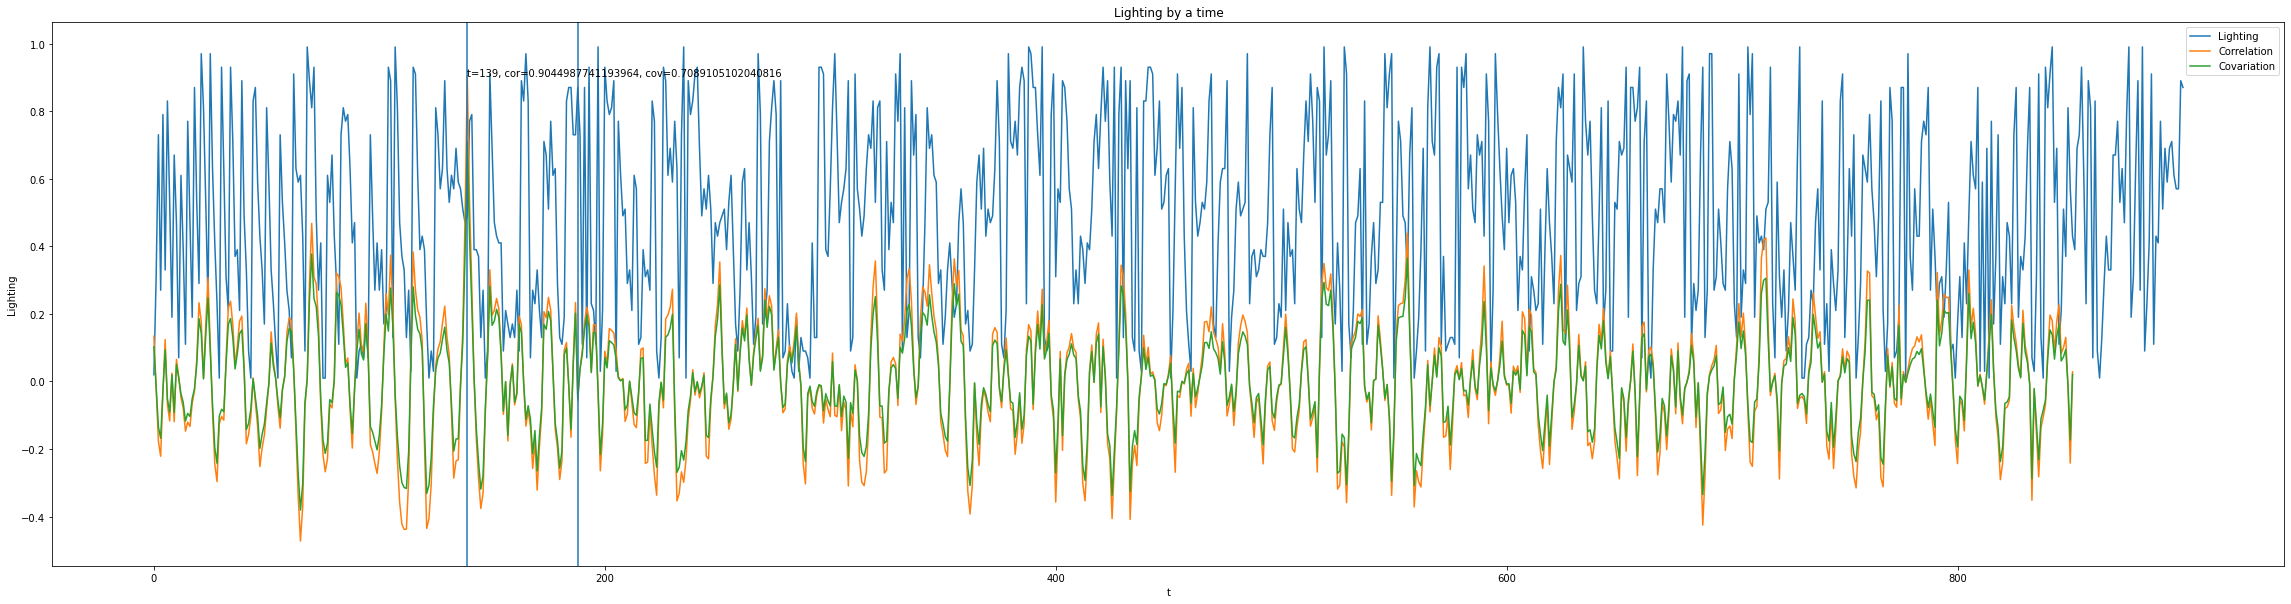

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 10]

xs = range(Xsize)

plt.plot(range(Xsize), Xs, label='Lighting')
plt.plot(range(len(corYs)), corYs, label='Correlation')
plt.plot(range(len(covYs)), covYs, label='Covariation')

plt.xlabel('t')
plt.ylabel('Lighting')
plt.title('Lighting by a time')
plt.legend()

plt.axvline(x=best['start'])
plt.axvline(x=best['end'])

plt.annotate('t=' + str(best['start']) + ', cor=' + str(best['cor']) + ', cov=' + str(best['cov']), (best['start'], best['cor']))

plt.show()

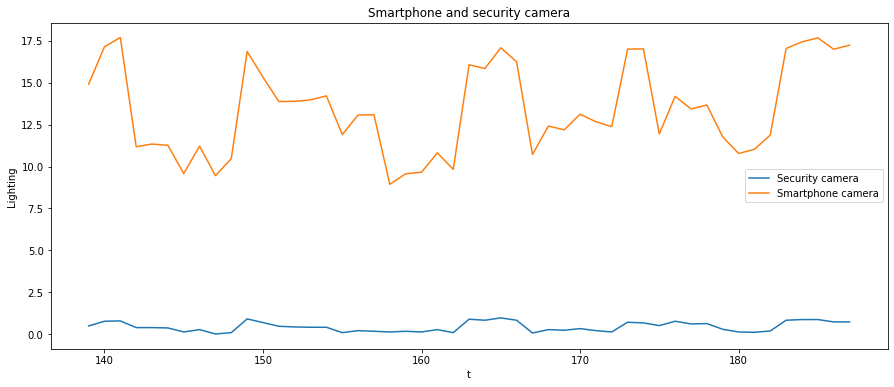

In [31]:
plt.rcParams['figure.figsize'] = [15, 6]

Xres = Xs[best['start']:best['end']]
Xaxis = np.arange(best['start'], best['end'])
plt.plot(Xaxis, Xres, label='Security camera')
plt.plot(Xaxis, Ys, label='Smartphone camera')

plt.xlabel('t')
plt.ylabel('Lighting')
plt.title('Smartphone and security camera')
plt.legend()

plt.show()